# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_path = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold reponse info 
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | turayf
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | muisne
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | salekhard
Processing Record 20 of Set 1 | ankeny
Processing Record 21 of Set 1 | kununurr

Processing Record 35 of Set 4 | vysokogornyy
Processing Record 36 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 37 of Set 4 | upernavik
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | college
Processing Record 40 of Set 4 | karaton
Processing Record 41 of Set 4 | fort myers beach
Processing Record 42 of Set 4 | mayo
Processing Record 43 of Set 4 | bilibino
Processing Record 44 of Set 4 | srednekolymsk
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | mezen
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | golden
Processing Record 0 of Set 5 | suntar
Processing Record 1 of Set 5 | sinegorye
Processing Record 2 of Set 5 | general bravo
Processing Record 3 of Set 5 | kirkwood
Processing Record 4 of Set 5 | coahuayana
Processing Record 5 of Set 5 | groa
Processing Record 6 of Set 5 | mega
Processing Record 7 of Set 5 | nikolskoye
Processing Record 8 of Set

Processing Record 27 of Set 8 | salcedo
Processing Record 28 of Set 8 | balsas
Processing Record 29 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 30 of Set 8 | orasac
Processing Record 31 of Set 8 | ukiah
Processing Record 32 of Set 8 | chara
Processing Record 33 of Set 8 | thinadhoo
Processing Record 34 of Set 8 | sorong
Processing Record 35 of Set 8 | taquari
Processing Record 36 of Set 8 | samusu
City not found. Skipping...
Processing Record 37 of Set 8 | birin
Processing Record 38 of Set 8 | mitu
Processing Record 39 of Set 8 | geraldton
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | mutare
Processing Record 42 of Set 8 | baracoa
Processing Record 43 of Set 8 | luwuk
Processing Record 44 of Set 8 | margate
Processing Record 45 of Set 8 | yima
Processing Record 46 of Set 8 | veraval
Processing Record 47 of Set 8 | yiyang
Processing Record 48 of Set 8 | mutis
Processing Record 49 of Set 8 | rancho palos verdes
Processing Record 0 of Se

Processing Record 18 of Set 12 | dunedin
Processing Record 19 of Set 12 | afikpo
Processing Record 20 of Set 12 | oruro
Processing Record 21 of Set 12 | bograd
Processing Record 22 of Set 12 | sayat
Processing Record 23 of Set 12 | wang saphung
Processing Record 24 of Set 12 | alamosa
Processing Record 25 of Set 12 | verkhnetulomskiy
Processing Record 26 of Set 12 | chandler
Processing Record 27 of Set 12 | cazaje
City not found. Skipping...
Processing Record 28 of Set 12 | broome
Processing Record 29 of Set 12 | tocopilla
Processing Record 30 of Set 12 | kinshasa
Processing Record 31 of Set 12 | kokopo
Processing Record 32 of Set 12 | inyonga
Processing Record 33 of Set 12 | mokhsogollokh
Processing Record 34 of Set 12 | stoyba
City not found. Skipping...
Processing Record 35 of Set 12 | thoen
Processing Record 36 of Set 12 | henties bay
Processing Record 37 of Set 12 | sangar
Processing Record 38 of Set 12 | baraya
Processing Record 39 of Set 12 | banos
Processing Record 40 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame(city_data)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,51.53,66,95,26.57,AU,1659458408
1,saskylakh,71.9167,114.0833,43.68,87,100,6.76,RU,1659458413
2,punta arenas,-53.1500,-70.9167,44.71,76,75,10.36,CL,1659458420
3,rikitea,-23.1203,-134.9692,72.07,76,92,20.11,PF,1659458408
4,ushuaia,-54.8000,-68.3000,42.46,81,75,4.61,AR,1659458267
...,...,...,...,...,...,...,...,...,...
558,newton,42.3370,-71.2092,92.21,53,0,11.50,US,1659458747
559,bettendorf,41.5245,-90.5157,79.41,76,0,8.05,US,1659458773
560,novo aripuana,-5.1206,-60.3797,93.52,42,88,4.47,BR,1659458773
561,ntoum,0.3833,9.7833,78.58,67,96,7.56,GA,1659458773


In [5]:
# Open the file using "write" mode. Specify the variable to hold the contents
#with open(output_path, 'w') as csvfile:

  
output_data_file = "cities.csv"  
    
    



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_more_than_hundred = []
humidity_more_than_hundred.append(weather_data.loc[weather_data['Humidity'] >100] )
humidity_more_than_hundred

# As none of the cities in the data set has humidity more than hundred persent, no rows were cleaned in the dataframe
# weather_data

[Empty DataFrame
 Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
 Index: []]

In [7]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

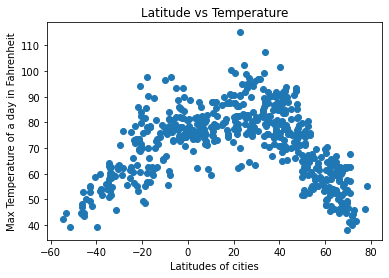

In [9]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitudes of cities')
plt.ylabel('Max Temperature of a day in Fahrenheit')
plt.show()

## Latitude vs. Humidity Plot

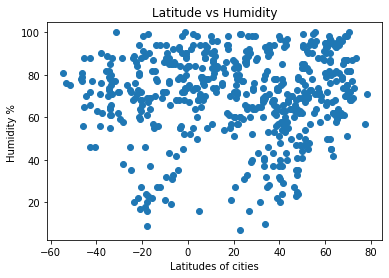

In [10]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitudes of cities')
plt.ylabel('Humidity % ')
plt.show()

## Latitude vs. Cloudiness Plot

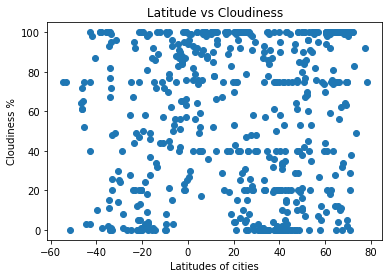

In [11]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitudes of cities')
plt.ylabel('Cloudiness %')
plt.show()

## Latitude vs. Wind Speed Plot

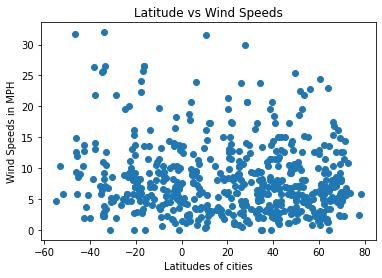

In [12]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Wind Speeds')
plt.xlabel('Latitudes of cities')
plt.ylabel('Wind Speeds in MPH')
plt.show()

## Linear Regression

In [13]:
# Get all the cities on equator and the northern hemisphere 
weather_north = weather_data.loc[weather_data['Lat'] >= 0] 
weather_north

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,saskylakh,71.9167,114.0833,43.68,87,100,6.76,RU,1659458413
6,hilo,19.7297,-155.0900,72.28,87,75,5.75,US,1659458223
7,turayf,31.6725,38.6637,97.05,20,0,9.22,SA,1659458661
8,georgetown,5.4112,100.3354,80.53,94,40,5.01,MY,1659458280
9,muisne,0.6000,-80.0333,74.98,84,99,12.50,EC,1659458661
...,...,...,...,...,...,...,...,...,...
554,erenhot,43.6475,111.9767,76.53,68,20,12.93,CN,1659458772
555,acapulco,16.8634,-99.8901,87.62,62,40,3.44,MX,1659458428
558,newton,42.3370,-71.2092,92.21,53,0,11.50,US,1659458747
559,bettendorf,41.5245,-90.5157,79.41,76,0,8.05,US,1659458773


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4227995859726328


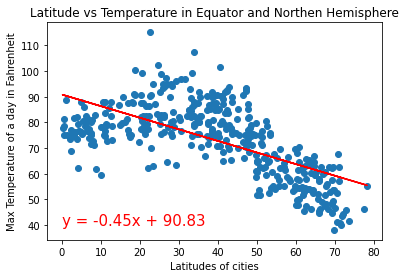

In [14]:
x_values = weather_north['Lat']
y_values = weather_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.title('Latitude vs Temperature in Equator and Northen Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Max Temperature of a day in Fahrenheit')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Get all the cities in the southern hemisphere 
weather_south = weather_data.loc[weather_data['Lat'] < 0] 
weather_south

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,51.53,66,95,26.57,AU,1659458408
2,punta arenas,-53.1500,-70.9167,44.71,76,75,10.36,CL,1659458420
3,rikitea,-23.1203,-134.9692,72.07,76,92,20.11,PF,1659458408
4,ushuaia,-54.8000,-68.3000,42.46,81,75,4.61,AR,1659458267
5,bredasdorp,-34.5322,20.0403,50.99,82,11,2.55,ZA,1659458416
...,...,...,...,...,...,...,...,...,...
553,pangkalanbuun,-2.6833,111.6167,73.87,98,85,1.12,ID,1659458772
556,maragogi,-9.0122,-35.2225,75.34,90,99,13.20,BR,1659458506
557,cururupu,-1.8283,-44.8683,84.38,68,20,7.74,BR,1659458566
560,novo aripuana,-5.1206,-60.3797,93.52,42,88,4.47,BR,1659458773


The r-squared is: 0.5766628147279756


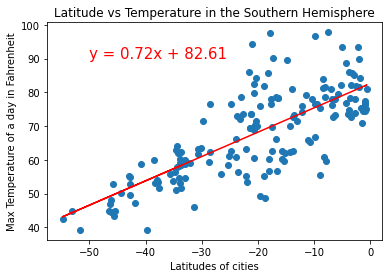

In [16]:
x_values = weather_south['Lat']
y_values = weather_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title('Latitude vs Temperature in the Southern Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Max Temperature of a day in Fahrenheit')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001266148372024439


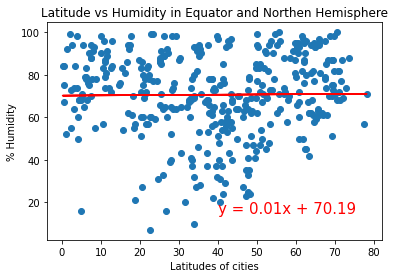

In [17]:
x_values = weather_north['Lat']
y_values = weather_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title('Latitude vs Humidity in Equator and Northen Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('% Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002043753552958944


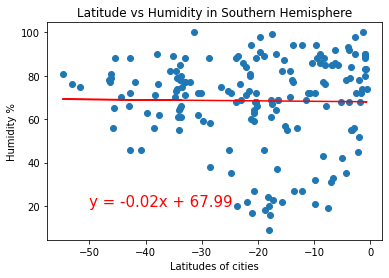

In [18]:
x_values = weather_south['Lat']
y_values = weather_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001004977980591105


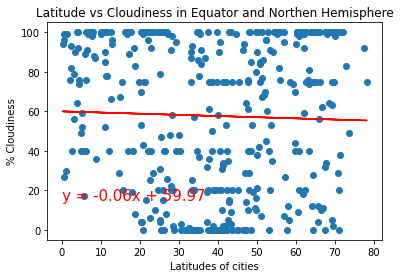

In [19]:
x_values = weather_north['Lat']
y_values = weather_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in Equator and Northen Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('% Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007581705178314497


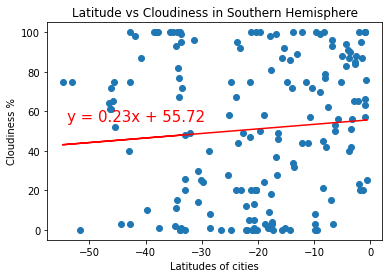

In [20]:
x_values = weather_south['Lat']
y_values = weather_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,55),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0010488381612744344


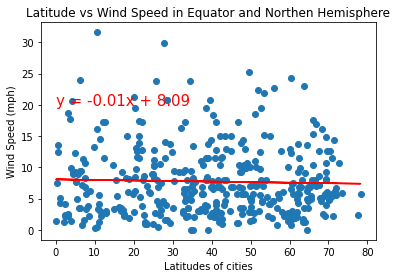

In [21]:
x_values = weather_north['Lat']
y_values = weather_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in Equator and Northen Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.021261300588643537


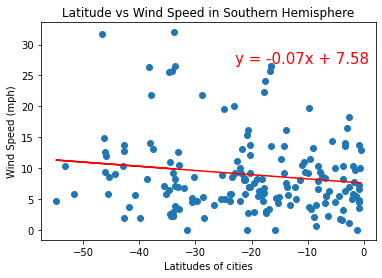

In [22]:
x_values = weather_south['Lat']
y_values = weather_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,27),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in Southern Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [23]:
## The cities in the data frame weather_data are from northern hemisphere, southern hemisphere and the equator.
## From regression graphs of all the cities, we can look at the regression values
## For the Northern hemisphere, the R**2 (r-squared) value is  0.42279958597263280.5766628147279756
## For the Southern hemiphere, the R**2 (r-sqaured) value is 0.5766628147279756
## If the regression is in the vicinity of 0.5, we can say that the correlation between the temperature and latitude 
## is very strong
## Therefore we can conclude that the temperatures are inversely proportional to
## the latitudes. The more the distance of a city from equator, the lesser is the temperature.

## All other measures like humidity, cloudiness and wind speed have no relationship with latitudes. This can be observed 
## in each graph above